In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests

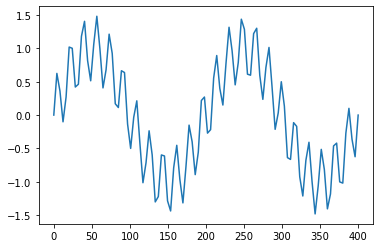

In [2]:
#I just want to play with some shit
N = 100
x = np.linspace(0.0, 400, N)
y = np.sin(50.0 * 2.0*np.pi*x)  + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x,y)
plt.show() 

100


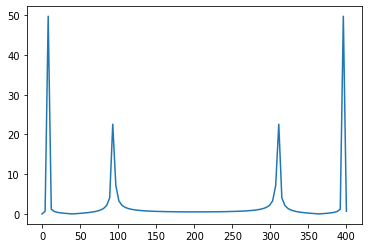

In [3]:
yf = np.fft.fft(y)
print(len(yf))
plt.plot(x,np.abs(yf))
#plt.grid()
plt.show() 

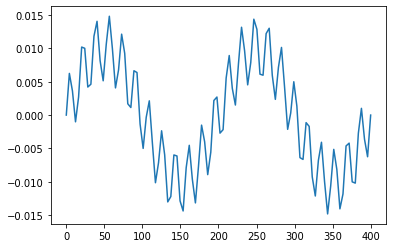

In [4]:
#This is the part I want to play around with, I want to try an ifft and get the original graph
y2 = np.fft.ifft(yf).real/100
plt.plot(x, y2)
plt.show() #Yup, it returns it, that's actually pretty nice

In [21]:
#This is where the homework begins
#This first part will grab the data from the url
data = requests.get("http://www-personal.umich.edu/~mejn/cp/data/circular.txt")

In [22]:
print(data.text[0])
print(type(data.text[0]))

1
<class 'str'>


In [24]:
splt = data.text.split() #This will split the data by the spaces
convert = [float(i) for i in splt] #This will convert the data

In [37]:
print(len(convert))

251001


In [38]:
print((len(convert))**(1/2))

501.0


In [40]:
image = np.reshape(convert, (501, 501))

In [48]:
plt.imsave("image.png", image)

In [59]:
#This will begine the discrete fourier transform
transform = np.fft.fft(convert)

251001
[0.00000000e+00 1.00000398e+00 2.00000797e+00 ... 2.50999000e+05
 2.51000000e+05 2.51001000e+05]


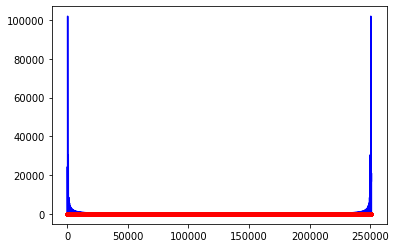

In [66]:
print(len(convert))
x = np.linspace(0, 251001, num=251001)
print(x)
plt.plot(x, np.abs(transform), "b-")
plt.plot(x, np.angle(transform), "r.-")
plt.show()


In [87]:
compress = transform[np.abs(transform)>10]
print(len(compress))
print((len(compress))**(1/2))

31023
176.13347211702833


In [89]:
i = 176
x = 0
y = 0
while i > 0:
    x = i
    if 31023 % x == 0:
        y = 31023 / x
        break
    i -= 1
    
print(x, y)

81 383.0


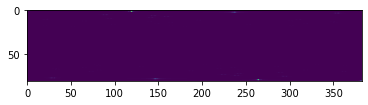

In [95]:
test = np.reshape(np.abs(compress), (81, 383))
plt.imshow(test)

In [124]:
transform = np.fft.fft2(image)

In [125]:
transform[np.abs(transform) < 500] = 0

In [126]:
print(np.count_nonzero(transform))

669


In [129]:
test = np.fft.ifft2(transform).real
plt.imsave("compress.png", test)

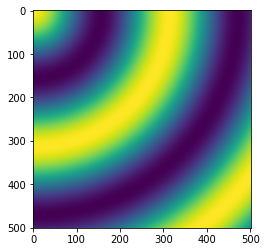

In [130]:
plt.imshow(image)